# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [98]:
sisnac = pd.read_csv("SINASC_RO_2019.csv")
sisnac = sisnac.dropna(subset='APGAR5')

sisnac['APGAR5'] = sisnac['APGAR5'].astype(int)

sisnac.loc[(sisnac['APGAR5'] >= 8) & (sisnac['APGAR5'] <= 10),'APGAR_CAT'] = 'NORMAL'
sisnac.loc[(sisnac['APGAR5'] >= 7) & (sisnac['APGAR5'] < 8),'APGAR_CAT'] = 'ASFIXIA LEVE'
sisnac.loc[(sisnac['APGAR5'] >= 4) & (sisnac['APGAR5'] < 7),'APGAR_CAT'] = 'ASFIXIA MODERADA'
sisnac.loc[(sisnac['APGAR5'] <= 3), 'APGAR_CAT'] = 'ASFIXIA SEVERA'



,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR_CAT
8850,1,4001303.0,110020,1,23,1.0,8 a 11 anos,999992.0,NaN,NaN,...,8921,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,NORMAL
8851,1,4001303.0,110020,1,19,1.0,8 a 11 anos,999994.0,NaN,NaN,...,8922,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,NORMAL
8852,1,4001303.0,110020,1,18,1.0,8 a 11 anos,999992.0,NaN,NaN,...,8923,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,NORMAL
8853,1,4001303.0,110020,1,35,1.0,4 a 7 anos,354705.0,3.0,1.0,...,8924,ATIVO,MUNIC,Nova Mamoré,Rondônia,-10.41177,-65.32915,151.0,10071.643,NORMAL
8854,1,4001303.0,110020,1,32,1.0,8 a 11 anos,422105.0,2.0,1.0,...,8926,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,NORMAL
8855,1,4001303.0,110020,1,18,1.0,8 a 11 anos,999992.0,NaN,NaN,...,8927,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,NORMAL
8856,1,4001303.0,110020,1,21,1.0,4 a 7 anos,999992.0,1.0,1.0,...,8928,ATIVO,MUNIC,Monte Negro,Rondônia,-10.26310,-63.29556,155.0,1931.378,NORMAL
8857,1,4001303.0,110020,1,23,1.0,8 a 11 anos,999992.0,0.0,0.0,...,8929,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,NORMAL
8858,1,4001303.0,110020,1,17,1.0,4 a 7 anos,999992.0,0.0,0.0,...,8930,ATIVO,MUNIC,Candeias do Jamari,Rondônia,-8.78502,-63.70002,85.0,6843.868,NORMAL
8859,1,4001303.0,110020,1,27,1.0,4 a 7 anos,999992.0,2.0,0.0,...,8931,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,ASFIXIA LEVE


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [213]:
freq_perc2 = pd.crosstab(sisnac['APGAR5'], [sisnac['GESTACAO'],sisnac['SEXO']])
freq_perc2



GESTACAO 22 a 27 semanas           28 a 31 semanas           32 a 36 semanas  \
SEXO            Feminino Masculino        Feminino Masculino        Feminino   
APGAR5                                                                         
0                      3         4               0         0               0   
1                      0         0               0         0               1   
2                      5         3               1         1               1   
3                      3         3               1         0               2   
4                      0         1               4         1               4   
5                      0         0               5         2               4   
6                      0         2               3         4              10   
7                      6         4               4         7              27   
8                     13        11              26        35             155   
9                     11         8              29        26             634   
10                     4         4               7         6             205   

GESTACAO           37 a 41 semanas           42 semanas e mais            \
SEXO     Masculino        Feminino Masculino          Feminino Masculino   
APGAR5                                                                     
0                2               4         1                 0         1   
1                1              13         7                 0         0   
2                0               0         3                 0         0   
3                0               1         4                 0         0   
4                4               3         4                 0         0   
5                7               7        14                 1         0   
6                7              21        23                 1         0   
7               29              65        86                 0         5   
8              207             666       751                16        28   
9              673            6628      6936               206       217   
10             260            3582      3701               107       116   

GESTACAO Menos de 22 semanas            
SEXO                Feminino Masculino  
APGAR5                                  
0                          1         0  
1                          0         0  
2                          1         0  
3                          0         0  
4                          0         0  
5                          0         0  
6                          0         0  
7                          0         1  
8                          0         0  
9                          3         0  
10                         1         0

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [153]:
freq = pd.crosstab(sisnac['APGAR5'], sisnac['GESTACAO'])
freq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0,7,0,2,5,1,1
1,0,0,2,20,0,0
2,8,2,2,3,0,1
3,6,1,2,5,0,0
4,1,5,8,7,0,0
5,0,7,11,21,1,0
6,2,7,17,45,1,0
7,10,11,56,151,5,1
8,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [155]:
freq_perc = pd.crosstab(sisnac['APGAR5'], sisnac['GESTACAO'], normalize='index')
freq_perc

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='APGAR5'>

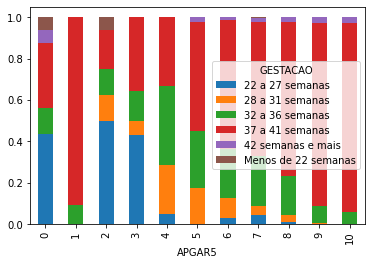

In [161]:
freq_perc.plot.bar(stacked=True)

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

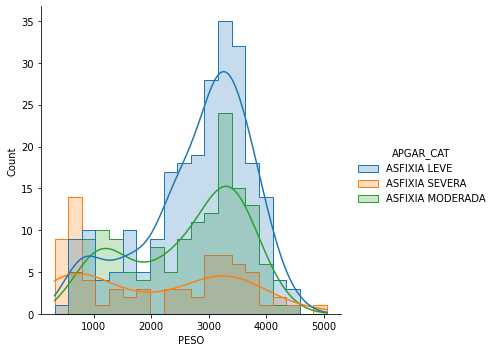

In [191]:
sns.displot(data = sisnac2
            ,x = 'PESO'
            ,hue = 'APGAR_CAT'
            ,bins = 20
            ,element = 'step'
            ,kde=True
           )